In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv("Social_Network_Ads.csv", usecols=[2,3,4])

In [167]:
# df = pd.read_csv("Social_Network_Ads.csv")
# df.iloc[:,2:]

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# Train Test Split
```
It is recommended to perform train test split when you perform featuring scalling whether it's `Standardization` or `Normalization`
```

In [170]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(["Purchased"], axis=1), df["Purchased"], 
                                                    test_size=0.3,
                                                   random_state=0)

In [171]:
x_train.shape

(280, 2)

In [172]:
x_test.shape

(120, 2)

# Standardization

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the prameters
scaler.fit(x_train) 
# Fir means to calculate of both the columns to check user scaler.mean_
# scaler.mean_
# One thing kept in mind that we learn from train set but transformed both the columns

# Transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [175]:
# scaler.mean_

In [176]:
# x_train_scaled ===>  This will return numpy array

In [177]:
# This will done because x_train_scaled return numpy array it's problem,
# so that to cope up this problem we converted this np array into data frame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [178]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [192]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

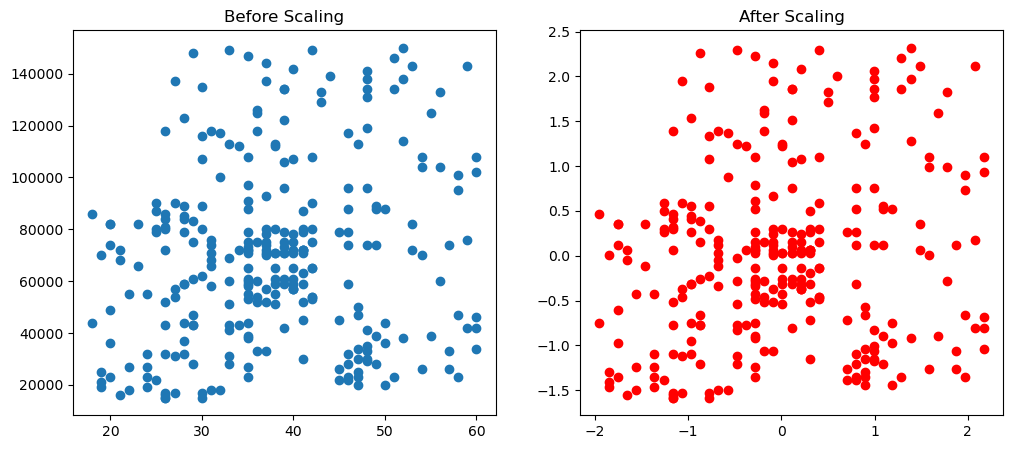

In [202]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

# After Scaling
ax2.scatter(x_train_scaled["Age"], x_train_scaled["EstimatedSalary"], color="red")
ax2.set_title("After Scaling")

plt.show()

C:\Users\atif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\atif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\atif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\atif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

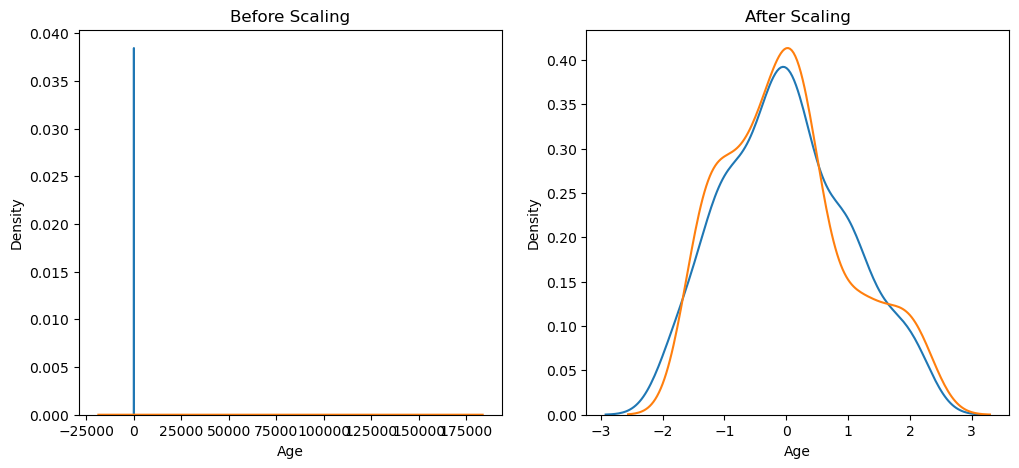

In [210]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"], ax=ax1)
sns.kdeplot(x_train["EstimatedSalary"], ax=ax1)

# After Scaling

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Age"], ax=ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"], ax=ax2)

plt.show()